In [1]:
import tensorflow as tf
from RL_brain import DeepQNetwork
import numpy as np
from env import Env
import matplotlib.pyplot as plt
from Configuration import printPeriodic,setDbgPrint,null

In [2]:
sim = {
    'cfg' : {
        'run' : { # run parameters
            'numEpisodes'    : 1, # 1,        # num. of episodes to run
            'maxSteps'       : 5000,         # max. num. of sim. steps
            'startLearnStep' : 200,           # start periodic training after this step num.
            'learnPeriod'    : 5,             # num. of steps between (re)training
            'dbgPrint'       : printPeriodic, # function or string name of function for debug print output
            'statusPeriod'   : 100,           # output program status at this interval
        },
        'dqn': {  # DQN parameters
            'learningRate': 0.01,  # please provide summary comments for each parameter
            'rewardDecay': 0.9,
            'eGreedy': 1,
            'eGreedyincrement': 0.005,  # Change the e_greedy value
            'replaceTargetIter': 200,
            'memorySize': 2000,
        }
    }
}

In [3]:
class run():
    def __init__(
            self,
            n_actions,
            n_features,
    ):
        self.n_actions = n_actions
        self.n_features = n_features
        self.built_net()
        self.sess = tf.Session()
        self.saver = tf.train.Saver()
        self.saver.restore(self.sess, 'my_net/my_test_model.ckpt') #Load parameter
        self.params = []
        self.cost_his = []
    def built_net(self):
        # Reconstruction neural network model.Only one of the neural networks is kept here.
        c_names, n_l1, w_initializer, b_initializer = ['target_net_params', tf.GraphKeys.GLOBAL_VARIABLES], 10, \
                                                      tf.random_normal_initializer(0., 0.3), tf.constant_initializer(0.1)
        self.env_state_ = tf.placeholder(tf.float32, [None, self.n_features], name='env_state_')
        with tf.variable_scope('target_net'):
            c_names = ['target_net_params', tf.GraphKeys.GLOBAL_VARIABLES]

            with tf.variable_scope(
                    'l1'):
                w1 = tf.get_variable('w1', [self.n_features, n_l1], initializer=w_initializer, collections=c_names)
                b1 = tf.get_variable('b1', [1, n_l1], initializer=b_initializer, collections=c_names)
                l1 = tf.nn.tanh(tf.matmul(self.env_state_, w1) + b1)
            with tf.variable_scope('l2'):
                w2 = tf.get_variable('w2', [n_l1, self.n_actions], initializer=w_initializer, collections=c_names)
                b2 = tf.get_variable('b2', [1, self.n_actions], initializer=b_initializer, collections=c_names)
                self.q_next = tf.matmul(l1, w2) + b2

    def choose_action(self, env_state):
        env_state = env_state[np.newaxis, :]
        actions_value = self.sess.run(self.q_next,feed_dict={self.env_state_: env_state})
        action = np.argmax(actions_value)
        return action

    def run_(self,cfg=None):
        numEpisodes = cfg['numEpisodes']
        maxSteps = cfg['maxSteps']
        dbgPrint = cfg.get('dbgPrint', null)

        statusPeriod = cfg.get('statusPeriod', 1)
        for episode in range(1,numEpisodes+1):
            step = 0
            env_state_1 = env.reset()
            while step < maxSteps:
                env_state = np.hstack((env_state_1["Channel_1"], env_state_1["Channel_6"],
                                       env_state_1["Channel_11"]))

                action = self.choose_action(env_state)
                if action == 0:
                    action_ = "Channel_1"
                elif action == 1:
                    action_ = "Channel_6"
                else:
                    action_ = "Channel_11"
                observation = env_state_1[action_]
                dbgPrint('{}: action_ = {}, observation = {}\n'.format(env.time, action_, observation),
                         period=statusPeriod, counter=env.time)
                print('{}: action_ = {}, observation = {}\n'.format(env.time, action_, observation))
                env_state_, observation_, reward = env.step(action_)
                env_state_ = np.hstack(( env_state_["Channel_1"],  env_state_["Channel_6"],
                                env_state_["Channel_11"]))
                env_state_ = {"Channel_1": env_state_[0:4],
                              "Channel_6": env_state_[4:8],
                              "Channel_11": env_state_[8:12]

                              }
                env_state_1 = env_state_
                step += 1

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from my_net/my_test_model.ckpt
2: action_ = Channel_6, observation = [0.47      0.47      0.7       0.0583444]

3: action_ = Channel_11, observation = [0.2        0.65       0.7        0.34812044]

4: action_ = Channel_6, observation = [0.67       0.73       0.4        0.09207231]

5: action_ = Channel_1, observation = [0.45       0.31       0.7        0.79764262]

6: action_ = Channel_1, observation = [0.66       0.42       1.         0.91233009]

7: action_ = Channel_11, observation = [0.47       0.52       1.         0.41525868]

8: action_ = Channel_6, observation = [0.01       0.75       1.         0.54617858]

9: action_ = Channel_6, observation = [0.21       0.69       0.4        0.18131753]

10: action_ = Channel_6, observation = [0.64       0.45       0.4        0.39345162]

11: actio


203: action_ = Channel_1, observation = [0.31       0.92       1.         0.17785594]

204: action_ = Channel_1, observation = [0.94       0.32       1.         0.36763779]

205: action_ = Channel_1, observation = [0.7        0.58       1.         0.39334627]

206: action_ = Channel_1, observation = [0.22       0.25       1.         0.03709513]

207: action_ = Channel_1, observation = [0.52       0.92       0.7        0.24709526]

208: action_ = Channel_11, observation = [0.86       0.48       1.         0.41517594]

209: action_ = Channel_1, observation = [0.89       0.53       1.         0.54997183]

210: action_ = Channel_11, observation = [0.77       0.91       0.4        0.52590088]

211: action_ = Channel_11, observation = [0.37       0.55       0.4        0.19305828]

212: action_ = Channel_1, observation = [0.93       0.58       0.7        0.19610033]

213: action_ = Channel_6, observation = [0.6        0.77       0.7        0.04292281]

214: action_ = Channel_11, observation 

463: action_ = Channel_1, observation = [0.42       0.77       0.7        0.30214948]

464: action_ = Channel_1, observation = [0.83       0.3        1.         0.16704425]

465: action_ = Channel_1, observation = [0.55       0.49       0.4        0.09572456]

466: action_ = Channel_6, observation = [0.87       0.28       1.         0.13193078]

467: action_ = Channel_6, observation = [0.18       0.12       1.         0.15643099]

468: action_ = Channel_6, observation = [0.14       0.06       1.         0.50300696]

469: action_ = Channel_1, observation = [0.71       0.71       0.7        0.74978613]

470: action_ = Channel_1, observation = [0.87       0.54       0.7        0.21628328]

471: action_ = Channel_11, observation = [0.32       0.52       1.         0.49982988]

472: action_ = Channel_11, observation = [0.9        0.3        0.4        0.09053622]

473: action_ = Channel_11, observation = [0.2        0.65       1.         0.06504582]

474: action_ = Channel_6, observation = 

754: action_ = Channel_11, observation = [0.66       0.42       0.4        0.15266097]

755: action_ = Channel_6, observation = [0.8       0.5       0.7       0.2534085]

756: action_ = Channel_6, observation = [0.6        0.82       1.         0.53223727]

757: action_ = Channel_11, observation = [0.62       0.13       1.         0.00809334]

758: action_ = Channel_11, observation = [0.66       0.66       1.         0.77073361]

759: action_ = Channel_6, observation = [0.92       0.61       1.         0.35988122]

760: action_ = Channel_11, observation = [0.82       0.41       0.7        0.09518547]

761: action_ = Channel_1, observation = [0.86       0.14       0.7        0.41894839]

762: action_ = Channel_11, observation = [0.18       0.99       0.7        0.60261432]

763: action_ = Channel_6, observation = [0.54       0.61       0.4        0.23284304]

764: action_ = Channel_1, observation = [0.71       0.83       1.         0.26648612]

765: action_ = Channel_11, observation = [

862: action_ = Channel_1, observation = [0.8        0.65       0.7        0.20332839]

863: action_ = Channel_1, observation = [0.29       0.22       1.         0.51657175]

864: action_ = Channel_11, observation = [0.89       0.36       0.7        0.14269905]

865: action_ = Channel_1, observation = [0.61       0.51       0.7        0.52007758]

866: action_ = Channel_11, observation = [0.68       0.93       1.         0.27300739]

867: action_ = Channel_11, observation = [0.42       0.45       1.         0.32606611]

868: action_ = Channel_11, observation = [0.87       0.93       0.7        0.16635101]

869: action_ = Channel_1, observation = [0.4        0.29       0.4        0.03549374]

870: action_ = Channel_6, observation = [0.19       0.33       0.7        0.18351299]

871: action_ = Channel_1, observation = [0.9        0.69       1.         0.66770088]

872: action_ = Channel_1, observation = [0.71       1.         0.4        0.29738888]

873: action_ = Channel_11, observation 


1077: action_ = Channel_1, observation = [0.75       0.32       0.7        0.35447031]

1078: action_ = Channel_11, observation = [0.65       0.17       1.         0.67489261]

1079: action_ = Channel_11, observation = [0.78      0.93      0.7       0.0569074]

1080: action_ = Channel_1, observation = [0.9        0.53       0.4        0.68564882]

1081: action_ = Channel_11, observation = [0.12       0.84       1.         0.74875243]

1082: action_ = Channel_11, observation = [0.91       0.78       1.         0.39263443]

1083: action_ = Channel_11, observation = [0.79      0.78      1.        0.9903836]

1084: action_ = Channel_6, observation = [0.9       0.12      0.7       0.0211346]

1085: action_ = Channel_11, observation = [0.21       0.76       0.7        0.54561367]

1086: action_ = Channel_6, observation = [0.58      0.65      0.4       0.1381277]

1087: action_ = Channel_1, observation = [0.81       0.49       0.         0.42304154]

1088: action_ = Channel_11, observation =


1177: action_ = Channel_1, observation = [0.44       0.49       1.         0.08457214]

1178: action_ = Channel_11, observation = [0.04     0.2      1.       0.058339]

1179: action_ = Channel_1, observation = [0.98       0.97       1.         0.34911383]

1180: action_ = Channel_11, observation = [0.38       0.19       1.         0.36456606]

1181: action_ = Channel_11, observation = [0.03       0.73       1.         0.33741548]

1182: action_ = Channel_6, observation = [0.38       0.48       0.7        0.60097455]

1183: action_ = Channel_11, observation = [0.98       0.8        1.         0.74386514]

1184: action_ = Channel_1, observation = [0.26       0.35       1.         0.12643009]

1185: action_ = Channel_11, observation = [0.2        0.77       1.         0.34502736]

1186: action_ = Channel_11, observation = [0.84       0.97       0.4        0.52186003]

1187: action_ = Channel_6, observation = [0.2        0.         0.4        0.12458818]

1188: action_ = Channel_1, observ

1380: action_ = Channel_1, observation = [0.65      0.77      0.7       0.1193795]

1381: action_ = Channel_1, observation = [0.95       0.84       1.         0.47479887]

1382: action_ = Channel_11, observation = [0.71       0.25       0.7        0.86179921]

1383: action_ = Channel_11, observation = [0.05       0.93       1.         0.48072552]

1384: action_ = Channel_11, observation = [0.68       0.53       1.         0.00853673]

1385: action_ = Channel_6, observation = [0.3       0.55      1.        0.0854998]

1386: action_ = Channel_11, observation = [0.44       0.04       0.7        0.14497794]

1387: action_ = Channel_1, observation = [0.52       0.86       0.7        0.45964246]

1388: action_ = Channel_6, observation = [0.86       0.4        1.         0.63654846]

1389: action_ = Channel_6, observation = [0.28       0.92       0.4        0.21940062]

1390: action_ = Channel_6, observation = [0.39       0.83       0.7        0.42085472]

1391: action_ = Channel_6, observati


1485: action_ = Channel_1, observation = [0.37       0.82       0.7        0.21111587]

1486: action_ = Channel_11, observation = [0.74       0.42       1.         0.01203707]

1487: action_ = Channel_11, observation = [0.47       0.74       1.         0.52246163]

1488: action_ = Channel_6, observation = [0.6        0.47       0.4        0.02517222]

1489: action_ = Channel_6, observation = [0.13       0.97       0.7        0.05598098]

1490: action_ = Channel_11, observation = [0.9        0.78       0.7        0.56639518]

1491: action_ = Channel_6, observation = [0.55      0.34      1.        0.3041714]

1492: action_ = Channel_1, observation = [0.2        0.84       0.7        0.43539115]

1493: action_ = Channel_6, observation = [0.74       0.85       0.7        0.10030569]

1494: action_ = Channel_11, observation = [0.76       0.14       0.7        0.45928654]

1495: action_ = Channel_11, observation = [0.65       0.56       0.7        0.56397665]

1496: action_ = Channel_1, obs

1708: action_ = Channel_11, observation = [0.27       0.82       0.7        0.06381905]

1709: action_ = Channel_1, observation = [0.13       0.88       0.7        0.32416166]

1710: action_ = Channel_11, observation = [0.63       0.32       0.4        0.00192832]

1711: action_ = Channel_6, observation = [0.48       0.94       0.4        0.11337574]

1712: action_ = Channel_6, observation = [0.69       0.79       0.7        0.60198479]

1713: action_ = Channel_6, observation = [0.03       0.31       1.         0.08594842]

1714: action_ = Channel_6, observation = [0.57       0.47       1.         0.07184664]

1715: action_ = Channel_1, observation = [0.76       0.3        0.4        0.16874025]

1716: action_ = Channel_11, observation = [0.9       0.36      1.        0.7551408]

1717: action_ = Channel_1, observation = [0.58       0.87       1.         0.33732618]

1718: action_ = Channel_1, observation = [0.73       0.43       0.         0.39500416]

1719: action_ = Channel_11, obser


1807: action_ = Channel_6, observation = [0.32       0.91       1.         0.01267247]

1808: action_ = Channel_6, observation = [0.37       0.74       0.7        0.13281926]

1809: action_ = Channel_6, observation = [0.52       0.47       1.         0.18211998]

1810: action_ = Channel_6, observation = [0.79       0.81       1.         0.12708431]

1811: action_ = Channel_11, observation = [0.81       0.13       0.4        0.05985761]

1812: action_ = Channel_11, observation = [0.29      0.37      0.7       0.1534207]

1813: action_ = Channel_11, observation = [0.03       0.75       0.7        0.35865453]

1814: action_ = Channel_11, observation = [0.54       0.67       1.         0.67963405]

1815: action_ = Channel_6, observation = [0.21       0.16       1.         0.62839794]

1816: action_ = Channel_6, observation = [0.68       0.76       1.         0.81517996]

1817: action_ = Channel_6, observation = [0.27       0.94       0.         0.16040771]

1818: action_ = Channel_1, obse


2013: action_ = Channel_1, observation = [0.73      0.79      1.        0.0353642]

2014: action_ = Channel_1, observation = [0.7        0.68       1.         0.95810265]

2015: action_ = Channel_6, observation = [0.74       0.2        1.         0.07856551]

2016: action_ = Channel_6, observation = [0.9        0.85       0.         0.06722955]

2017: action_ = Channel_11, observation = [0.06       0.04       0.7        0.13123467]

2018: action_ = Channel_1, observation = [1.         0.33       0.4        0.19010553]

2019: action_ = Channel_11, observation = [0.53       0.84       0.4        0.13447279]

2020: action_ = Channel_6, observation = [0.15       0.31       1.         0.24647625]

2021: action_ = Channel_6, observation = [0.75       1.         0.4        0.18784529]

2022: action_ = Channel_1, observation = [0.59       0.62       0.4        0.07127128]

2023: action_ = Channel_11, observation = [0.99       0.5        1.         0.62104403]

2024: action_ = Channel_11, obse


2112: action_ = Channel_6, observation = [0.74       0.65       0.7        0.60929164]

2113: action_ = Channel_1, observation = [0.01       0.24       1.         0.19086316]

2114: action_ = Channel_6, observation = [0.02       0.26       1.         0.28037424]

2115: action_ = Channel_11, observation = [0.8       0.55      0.7       0.4828362]

2116: action_ = Channel_6, observation = [0.43       0.15       0.7        0.11934084]

2117: action_ = Channel_6, observation = [0.22       0.79       0.7        0.00871616]

2118: action_ = Channel_1, observation = [0.73       0.9        1.         0.74154739]

2119: action_ = Channel_6, observation = [0.85       0.73       1.         0.08658735]

2120: action_ = Channel_11, observation = [1.         0.68       0.         0.13715439]

2121: action_ = Channel_11, observation = [0.73       0.59       0.7        0.44890072]

2122: action_ = Channel_6, observation = [0.21     0.81     1.       0.560092]

2123: action_ = Channel_6, observation =

2353: action_ = Channel_6, observation = [0.87       0.96       1.         0.93722658]

2354: action_ = Channel_6, observation = [0.91       0.95       1.         0.08436057]

2355: action_ = Channel_1, observation = [0.59       0.77       0.         0.50606878]

2356: action_ = Channel_11, observation = [0.25      0.92      0.7       0.1712197]

2357: action_ = Channel_1, observation = [0.38       0.07       1.         0.26672187]

2358: action_ = Channel_6, observation = [0.73       0.52       1.         0.48650743]

2359: action_ = Channel_1, observation = [0.4       0.33      0.7       0.6139123]

2360: action_ = Channel_6, observation = [0.31       0.99       0.7        0.50048907]

2361: action_ = Channel_1, observation = [0.51       0.53       0.7        0.49984727]

2362: action_ = Channel_11, observation = [0.86       0.68       0.7        0.40940753]

2363: action_ = Channel_11, observation = [0.65       0.99       1.         0.10399441]

2364: action_ = Channel_11, observati

2452: action_ = Channel_11, observation = [0.96       0.81       0.4        0.33266707]

2453: action_ = Channel_6, observation = [0.63       0.45       1.         0.54322567]

2454: action_ = Channel_6, observation = [0.66       0.62       1.         0.02119948]

2455: action_ = Channel_11, observation = [0.97      0.13      1.        0.5771901]

2456: action_ = Channel_11, observation = [0.65      0.16      0.7       0.0442875]

2457: action_ = Channel_1, observation = [0.56       0.87       1.         0.06833713]

2458: action_ = Channel_6, observation = [0.06       0.84       1.         0.20019301]

2459: action_ = Channel_1, observation = [0.18       0.58       0.7        0.98136989]

2460: action_ = Channel_1, observation = [0.27      0.95      1.        0.9836921]

2461: action_ = Channel_11, observation = [0.54      0.37      0.7       0.2645324]

2462: action_ = Channel_1, observation = [0.69       0.35       0.7        0.11824342]

2463: action_ = Channel_11, observation = [0


2666: action_ = Channel_1, observation = [0.27       0.06       0.4        0.45138389]

2667: action_ = Channel_6, observation = [0.21       0.51       0.7        0.09761164]

2668: action_ = Channel_1, observation = [0.97       0.64       1.         0.18042623]

2669: action_ = Channel_11, observation = [0.72       0.38       1.         0.65834945]

2670: action_ = Channel_6, observation = [0.99       0.56       1.         0.28981114]

2671: action_ = Channel_6, observation = [0.92       0.88       0.4        0.43242957]

2672: action_ = Channel_11, observation = [0.86       0.46       0.7        0.00918603]

2673: action_ = Channel_6, observation = [0.95       0.89       1.         0.17326225]

2674: action_ = Channel_11, observation = [0.3        0.55       1.         0.53724632]

2675: action_ = Channel_1, observation = [0.35       0.33       1.         0.73217704]

2676: action_ = Channel_6, observation = [0.36       0.92       1.         0.44463012]

2677: action_ = Channel_11, 


2767: action_ = Channel_6, observation = [0.92      0.67      0.7       0.5878378]

2768: action_ = Channel_1, observation = [0.82       0.43       0.7        0.65391894]

2769: action_ = Channel_1, observation = [0.2        0.18       1.         0.72201271]

2770: action_ = Channel_6, observation = [0.7        0.28       0.7        0.28274477]

2771: action_ = Channel_11, observation = [0.75       0.96       0.7        0.67696118]

2772: action_ = Channel_1, observation = [0.78       0.59       0.4        0.53431379]

2773: action_ = Channel_6, observation = [0.64       0.81       1.         0.61905652]

2774: action_ = Channel_11, observation = [0.19       0.74       1.         0.09864249]

2775: action_ = Channel_6, observation = [0.31       0.56       1.         0.12647013]

2776: action_ = Channel_11, observation = [0.88       0.3        1.         0.14862812]

2777: action_ = Channel_11, observation = [0.78       0.98       1.         0.18094386]

2778: action_ = Channel_1, obse

3005: action_ = Channel_11, observation = [0.92       0.54       0.         0.45792107]

3006: action_ = Channel_1, observation = [0.46       0.84       1.         0.19656805]

3007: action_ = Channel_1, observation = [0.85       0.05       1.         0.52244542]

3008: action_ = Channel_11, observation = [0.1        0.64       1.         0.62304173]

3009: action_ = Channel_6, observation = [0.97       0.19       1.         0.22005468]

3010: action_ = Channel_1, observation = [0.37       0.74       1.         0.30878563]

3011: action_ = Channel_6, observation = [0.84       0.57       0.7        0.29110195]

3012: action_ = Channel_6, observation = [0.27       0.35       1.         0.20470622]

3013: action_ = Channel_1, observation = [0.54       0.85       1.         0.85313203]

3014: action_ = Channel_1, observation = [0.48       0.9        1.         0.86858077]

3015: action_ = Channel_6, observation = [0.11       0.55       0.4        0.21920972]

3016: action_ = Channel_1, obs

3110: action_ = Channel_1, observation = [0.86       0.35       0.7        0.14548178]

3111: action_ = Channel_6, observation = [0.69       0.47       1.         0.73467361]

3112: action_ = Channel_6, observation = [0.78       0.53       1.         0.61703779]

3113: action_ = Channel_11, observation = [0.88       0.86       0.7        0.17033026]

3114: action_ = Channel_6, observation = [0.12      0.26      1.        0.3938675]

3115: action_ = Channel_11, observation = [0.8        0.69       0.7        0.96914516]

3116: action_ = Channel_6, observation = [0.65       0.34       1.         0.49683811]

3117: action_ = Channel_6, observation = [0.99       0.36       0.7        0.82141336]

3118: action_ = Channel_1, observation = [0.02       0.58       1.         0.78086937]

3119: action_ = Channel_1, observation = [0.51       0.24       0.4        0.44540446]

3120: action_ = Channel_1, observation = [0.49       0.36       0.7        0.33441122]

3121: action_ = Channel_6, observa

3349: action_ = Channel_11, observation = [0.91       0.79       0.7        0.11620385]

3350: action_ = Channel_11, observation = [0.61       0.97       1.         0.40965796]

3351: action_ = Channel_11, observation = [0.91       0.74       0.7        0.72085234]

3352: action_ = Channel_11, observation = [0.4        0.46       0.7        0.30645817]

3353: action_ = Channel_6, observation = [0.68       0.68       0.7        0.83709161]

3354: action_ = Channel_11, observation = [0.85       0.55       0.         0.49434759]

3355: action_ = Channel_11, observation = [0.42       0.13       1.         0.39522146]

3356: action_ = Channel_11, observation = [0.8        0.07       1.         0.08480971]

3357: action_ = Channel_1, observation = [0.69       0.52       0.7        0.74756337]

3358: action_ = Channel_11, observation = [0.63       0.61       0.4        0.53018147]

3359: action_ = Channel_1, observation = [0.63       0.04       1.         0.26946201]

3360: action_ = Channel_


3457: action_ = Channel_1, observation = [0.38       0.75       0.7        0.94193183]

3458: action_ = Channel_1, observation = [0.54       0.14       1.         0.99018539]

3459: action_ = Channel_11, observation = [0.57       0.93       0.7        0.69740479]

3460: action_ = Channel_11, observation = [0.48       0.72       1.         0.37870737]

3461: action_ = Channel_1, observation = [0.97       0.12       0.         0.18437785]

3462: action_ = Channel_1, observation = [0.85       0.55       1.         0.19772376]

3463: action_ = Channel_1, observation = [0.74       0.32       1.         0.42502871]

3464: action_ = Channel_11, observation = [0.59       0.02       1.         0.74969936]

3465: action_ = Channel_6, observation = [0.2        0.96       1.         0.28287319]

3466: action_ = Channel_1, observation = [0.77       0.11       1.         0.77714113]

3467: action_ = Channel_6, observation = [0.5        0.56       1.         0.41027776]

3468: action_ = Channel_6, o

3674: action_ = Channel_1, observation = [0.95       0.88       0.7        0.80754113]

3675: action_ = Channel_11, observation = [0.61       0.75       0.4        0.00707208]

3676: action_ = Channel_11, observation = [0.95       0.28       0.         0.76951911]

3677: action_ = Channel_6, observation = [0.43       0.5        1.         0.64096111]

3678: action_ = Channel_6, observation = [0.18       0.28       0.7        0.06434922]

3679: action_ = Channel_1, observation = [0.85       0.84       1.         0.01584299]

3680: action_ = Channel_11, observation = [0.96       0.36       0.7        0.60629133]

3681: action_ = Channel_6, observation = [0.38       0.69       1.         0.12206409]

3682: action_ = Channel_6, observation = [0.96       0.72       0.         0.03053223]

3683: action_ = Channel_6, observation = [0.66       0.25       0.7        0.62384602]

3684: action_ = Channel_6, observation = [0.7        0.6        0.7        0.50245878]

3685: action_ = Channel_1, ob

3775: action_ = Channel_1, observation = [1.         0.55       0.7        0.60261214]

3776: action_ = Channel_1, observation = [0.96       0.58       1.         0.69108542]

3777: action_ = Channel_6, observation = [0.29       0.31       1.         0.53104082]

3778: action_ = Channel_6, observation = [0.94       0.01       0.         0.21566323]

3779: action_ = Channel_11, observation = [0.68       0.98       0.         0.18753796]

3780: action_ = Channel_11, observation = [0.88       0.93       1.         0.36645753]

3781: action_ = Channel_6, observation = [0.96       0.01       1.         0.04303297]

3782: action_ = Channel_6, observation = [0.95       0.01       0.4        0.48996667]

3783: action_ = Channel_11, observation = [0.56       0.73       1.         0.63309733]

3784: action_ = Channel_6, observation = [0.78       0.7        1.         0.68012887]

3785: action_ = Channel_6, observation = [0.62       0.59       1.         0.47639931]

3786: action_ = Channel_11, o


3989: action_ = Channel_6, observation = [0.8        0.31       0.4        0.16184009]

3990: action_ = Channel_1, observation = [0.59       0.27       1.         0.63017339]

3991: action_ = Channel_1, observation = [0.81       0.68       0.7        0.36590991]

3992: action_ = Channel_11, observation = [0.66       0.56       0.4        0.51169235]

3993: action_ = Channel_1, observation = [0.34      0.9       0.7       0.9021369]

3994: action_ = Channel_11, observation = [0.91       0.3        1.         0.14022582]

3995: action_ = Channel_6, observation = [0.67       0.96       0.7        0.42071723]

3996: action_ = Channel_1, observation = [0.98       0.17       1.         0.15371187]

3997: action_ = Channel_6, observation = [0.64       0.19       0.         0.08113238]

3998: action_ = Channel_11, observation = [0.97     0.05     1.       0.048232]

3999: action_ = Channel_1, observation = [0.         0.81       0.7        0.73425299]

4000: action_ = Channel_11, observation 


4089: action_ = Channel_6, observation = [0.78       0.56       1.         0.23754214]

4090: action_ = Channel_1, observation = [0.61       0.14       0.7        0.44022438]

4091: action_ = Channel_11, observation = [0.92       0.85       0.         0.11184938]

4092: action_ = Channel_11, observation = [0.91       0.48       0.7        0.29917067]

4093: action_ = Channel_1, observation = [0.15       0.42       0.7        0.45990034]

4094: action_ = Channel_11, observation = [0.09       0.72       1.         0.67154525]

4095: action_ = Channel_1, observation = [0.08       0.81       1.         0.12363727]

4096: action_ = Channel_1, observation = [0.78       0.61       0.7        0.09591763]

4097: action_ = Channel_6, observation = [0.08       0.7        1.         0.05907868]

4098: action_ = Channel_6, observation = [0.01       0.25       1.         0.64875949]

4099: action_ = Channel_1, observation = [0.74       0.48       0.4        0.09789368]

4100: action_ = Channel_11, 

4304: action_ = Channel_11, observation = [0.81       0.49       0.         0.27122079]

4305: action_ = Channel_6, observation = [0.17       0.94       1.         0.23942711]

4306: action_ = Channel_6, observation = [0.17       0.42       1.         0.68468955]

4307: action_ = Channel_11, observation = [0.48       0.99       1.         0.10438964]

4308: action_ = Channel_1, observation = [0.88       0.36       1.         0.15964462]

4309: action_ = Channel_1, observation = [0.8        0.24       1.         0.75899947]

4310: action_ = Channel_6, observation = [0.68       0.74       1.         0.45920539]

4311: action_ = Channel_6, observation = [0.32       0.48       1.         0.32176415]

4312: action_ = Channel_1, observation = [0.7        0.46       0.7        0.66783327]

4313: action_ = Channel_1, observation = [0.22       0.38       0.7        0.26150213]

4314: action_ = Channel_1, observation = [0.5       0.42      0.4       0.3607599]

4315: action_ = Channel_11, observ

4411: action_ = Channel_6, observation = [0.16       0.33       0.7        0.27020137]

4412: action_ = Channel_6, observation = [0.6        0.95       0.         0.85869171]

4413: action_ = Channel_6, observation = [0.55       0.99       1.         0.80253687]

4414: action_ = Channel_11, observation = [0.89      0.39      1.        0.1911446]

4415: action_ = Channel_6, observation = [0.2        0.         1.         0.39574094]

4416: action_ = Channel_11, observation = [0.27      0.88      0.4       0.6737171]

4417: action_ = Channel_1, observation = [0.54       0.94       1.         0.00455736]

4418: action_ = Channel_1, observation = [0.93       0.96       1.         0.12997983]

4419: action_ = Channel_1, observation = [0.41       0.78       1.         0.33697723]

4420: action_ = Channel_11, observation = [0.94       0.16       0.4        0.12268908]

4421: action_ = Channel_6, observation = [0.63       0.28       0.7        0.15382759]

4422: action_ = Channel_1, observatio


4629: action_ = Channel_11, observation = [0.51       0.51       0.4        0.02881111]

4630: action_ = Channel_6, observation = [0.87       0.52       1.         0.95966679]

4631: action_ = Channel_1, observation = [0.33       0.32       0.7        0.19514758]

4632: action_ = Channel_6, observation = [0.02       0.78       1.         0.36972423]

4633: action_ = Channel_1, observation = [0.25       0.2        1.         0.11672034]

4634: action_ = Channel_6, observation = [0.49       0.48       0.7        0.17362075]

4635: action_ = Channel_1, observation = [0.88       0.52       0.7        0.29752215]

4636: action_ = Channel_6, observation = [0.88      0.71      0.7       0.2837954]

4637: action_ = Channel_6, observation = [0.56       0.9        0.7        0.14691351]

4638: action_ = Channel_6, observation = [0.8        1.         1.         0.81609174]

4639: action_ = Channel_11, observation = [0.29       0.22       0.7        0.53096627]

4640: action_ = Channel_1, observ


4736: action_ = Channel_6, observation = [0.1        0.88       0.7        0.18351381]

4737: action_ = Channel_11, observation = [0.6        0.72       0.7        0.40493043]

4738: action_ = Channel_1, observation = [0.56       0.48       0.7        0.16780983]

4739: action_ = Channel_1, observation = [0.92       0.32       0.7        0.07728367]

4740: action_ = Channel_11, observation = [0.85       0.39       0.         0.51821921]

4741: action_ = Channel_11, observation = [0.39       0.94       0.7        0.62524717]

4742: action_ = Channel_1, observation = [0.95       0.53       1.         0.17393894]

4743: action_ = Channel_11, observation = [0.58       0.32       0.7        0.87808739]

4744: action_ = Channel_11, observation = [0.3        0.38       1.         0.49739837]

4745: action_ = Channel_6, observation = [0.46       0.4        1.         0.97075276]

4746: action_ = Channel_1, observation = [0.27       0.99       0.7        0.04753308]

4747: action_ = Channel_6,


4941: action_ = Channel_1, observation = [0.34       0.24       1.         0.65987368]

4942: action_ = Channel_6, observation = [0.24      0.67      1.        0.5606867]

4943: action_ = Channel_1, observation = [0.8        0.77       0.7        0.74282543]

4944: action_ = Channel_6, observation = [0.03       0.17       1.         0.57663649]

4945: action_ = Channel_11, observation = [0.22       0.73       1.         0.11861969]

4946: action_ = Channel_6, observation = [0.32       0.96       1.         0.19346724]

4947: action_ = Channel_6, observation = [0.63       0.68       0.7        0.32108215]

4948: action_ = Channel_6, observation = [0.73      0.29      1.        0.5949165]

4949: action_ = Channel_6, observation = [0.72       0.65       1.         0.27488324]

4950: action_ = Channel_6, observation = [0.05       0.88       1.         0.82630245]

4951: action_ = Channel_1, observation = [0.96       0.77       0.7        0.80276423]

4952: action_ = Channel_1, observation

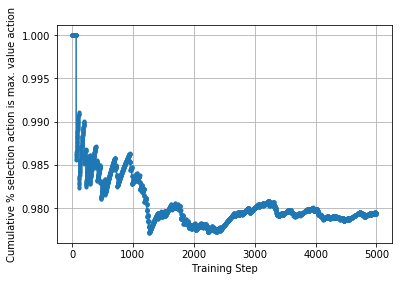

In [4]:
if __name__ == "__main__":
    statusPeriod = sim['cfg']['run']['statusPeriod']
    dbgPrint = setDbgPrint(sim['cfg']['run'].get('dbgPrint'))
    env = Env(log=dbgPrint, statusPeriod= statusPeriod)
    run = run(env.n_actions,
             env.n_features,
          )
    run.run_(cfg=sim['cfg']['run'])
    plt.plot(
        np.divide(np.cumsum([1 if i >= 1 else 0 for i in env.count_history]),
                  np.arange(len(env.count_history)) + 1),
        '.-')
    plt.xlabel('Training Step')
    plt.ylabel('Cumulative % selection action is max. value action')
    plt.grid(True)
    plt.show()
